![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

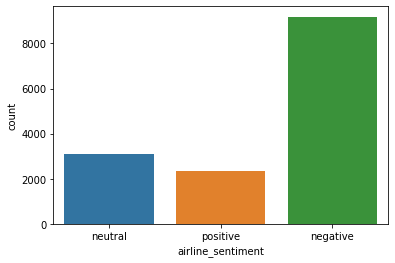

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()
sns.countplot(data=tweets, x='airline_sentiment')

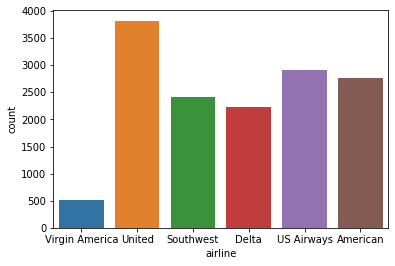

In [ ]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()
sns.countplot(data=tweets, x='airline')

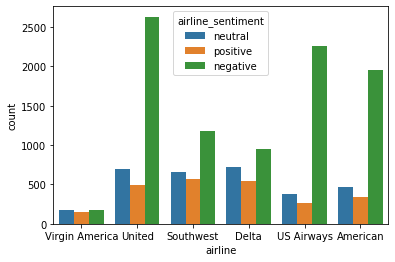

In [ ]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
#pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")
sns.countplot(data=tweets, x='airline', hue='airline_sentiment')

### Liberias y Variables de interés y predicción

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [7]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier

import re

df= tweets.copy()
df['text']= tweets.text.apply(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",x).split()))


# ANALISIS DE TOKENS POR SENTIMIENTO  PARA EXPLORAR EL VOCABULARIO FINAL
#UNI-GRAMAS SIN SUPRIMIR STOPWORDS
vect= CountVectorizer()
vect.fit(df[df.airline_sentiment=='negative'].text)
print(f'Vocab Negativo unigram:{vect.vocabulary_.keys()}')
print(f'Longitud Vocabulario Negativo Unigram: {len(vect.vocabulary_.keys())}\n')

vect= CountVectorizer()
vect.fit(df[df.airline_sentiment=='positive'].text)
print(f'Vocab Positvo unigram: {vect.vocabulary_.keys()}')
print(f'Longitud Vocabulario Positvo Unigram: {len(vect.vocabulary_.keys())}\n')

#BI-GRAMAS SIN SUPRIMIR STOPWORDS
vect= CountVectorizer(ngram_range=(2,2))
vect.fit(df[df.airline_sentiment=='negative'].text)
print(f'Vocab Negativo bigrama:{vect.vocabulary_.keys()}')
print(f'Longitud Vocabulario Negativo Bigram: {len(vect.vocabulary_.keys())}\n')

vect= CountVectorizer(ngram_range=(2,2))
vect.fit(df[df.airline_sentiment=='positive'].text)
print(f'Vocab Positvo bigrama:{vect.vocabulary_.keys()}')
print(f'Longitud Vocabulario Positivo Bigram: {len(vect.vocabulary_.keys())}\n')

#UNI-GRAMAS SIN STOPWORDS
vect= CountVectorizer(stop_words='english')
vect.fit(df[df.airline_sentiment=='negative'].text)
print(f'Vocab Negativo unigram:{vect.vocabulary_.keys()}')
print(f'Longitud Vocabulario Negativo Unigram (sin Stopwords): {len(vect.vocabulary_.keys())}\n')

vect= CountVectorizer(stop_words='english')
vect.fit(df[df.airline_sentiment=='positive'].text)
print(f'Vocab Positvo unigram: {vect.vocabulary_.keys()}')
print(f'Longitud Vocabulario Positvo Unigram (con Stopwords): {len(vect.vocabulary_.keys())}\n')

#BI-GRAMAS SIN  STOPWORDS
vect= CountVectorizer(ngram_range=(2,2),stop_words='english')
vect.fit(df[df.airline_sentiment=='negative'].text)
print(f'Vocab Negativo bigrama:{vect.vocabulary_.keys()}')
print(f'Longitud Vocabulario Negativo Bigram (sin Stopwords): {len(vect.vocabulary_.keys())}\n')

vect= CountVectorizer(ngram_range=(2,2),stop_words='english')
vect.fit(df[df.airline_sentiment=='positive'].text)
print(f'Vocab Positivo bigrama:{vect.vocabulary_.keys()}')
print(f'Longitud Vocabulario Positvo Bigram (sin Stopwords): {len(vect.vocabulary_.keys())}\n')



Vocab Negativo unigram:dict_keys(['it', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse', 'and', 'big', 'bad', 'thing', 'about', 'seriously', 'would', 'pay', '30', 'flight', 'for', 'seats', 'that', 'didn', 'this', 'playing', 'the', 'only', 'flying', 'va', 'sfo', 'pdx', 'schedule', 'is', 'still', 'mia', 'flew', 'from', 'nyc', 'last', 'week', 'couldn', 'fully', 'sit', 'my', 'seat', 'due', 'two', 'large', 'gentleman', 'on', 'either', 'side', 'of', 'me', 'help', 'why', 'are', 'first', 'fares', 'may', 'over', 'three', 'times', 'more', 'than', 'other', 'carriers', 'when', 'all', 'available', 'select', 'you', 'guys', 'messed', 'up', 'seating', 'reserved', 'with', 'friends', 'gave', 'away', 'want', 'free', 'internet', 'status', 'match', 'program', 'applied', 'been', 'weeks', 'called', 'emailed', 'no', 'response', 'what', 'happened', 'ur', 'vegan', 'food', 'options', 'at', 'least', 'say', 'site', 's

0.5980525884195534
              precision    recall  f1-score   support

          -1       0.77      0.96      0.86      3085
           0       0.69      0.39      0.50       984
           1       0.83      0.48      0.61       763

    accuracy                           0.77      4832
   macro avg       0.77      0.61      0.66      4832
weighted avg       0.77      0.77      0.75      4832

{-1: 0.7978062913907285, 0: 0.8410596026490066, 1: 0.9025248344370861}


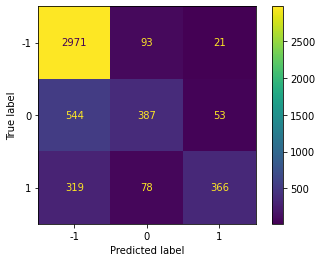

0.5906538706342668
              precision    recall  f1-score   support

          -1       0.80      0.84      0.82      3085
           0       0.48      0.51      0.50       984
           1       0.69      0.51      0.58       763

    accuracy                           0.72      4832
   macro avg       0.66      0.62      0.63      4832
weighted avg       0.72      0.72      0.72      4832

{-1: 0.7628311258278145, 0: 0.7897350993377483, 1: 0.8857615894039735}


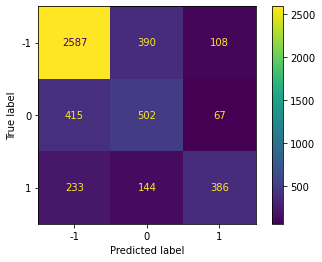

0.6183600317994132
              precision    recall  f1-score   support

          -1       0.79      0.95      0.86      3085
           0       0.67      0.45      0.54       984
           1       0.83      0.51      0.64       763

    accuracy                           0.78      4832
   macro avg       0.76      0.64      0.68      4832
weighted avg       0.77      0.78      0.76      4832

{-1: 0.8077400662251656, 0: 0.8420943708609272, 1: 0.9068708609271523}


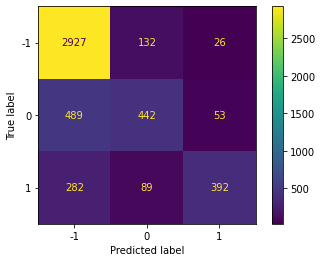

0.6113090397843651
              precision    recall  f1-score   support

          -1       0.85      0.76      0.80      3085
           0       0.47      0.51      0.49       984
           1       0.49      0.65      0.56       763

    accuracy                           0.69      4832
   macro avg       0.60      0.64      0.61      4832
weighted avg       0.71      0.69      0.70      4832

{-1: 0.7580711920529801, 0: 0.7822847682119205, 1: 0.8375413907284768}


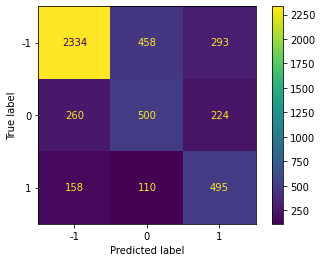

In [ ]:
#EXPERIMENTO 1 con UNIGRAMAS SIN SUPRESION DE STOPWORDS

# Limpiado
X_train= X_train.apply(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",x).split()))
X_test= X_test.apply(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",x).split()))

vect= CountVectorizer()
X_train_vect = vect.fit_transform(X_train)
X_test_vect= vect.transform(X_test)
X_train_vect
clf= RandomForestClassifier(random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)

from sklearn.metrics import  plot_confusion_matrix, classification_report,confusion_matrix, ConfusionMatrixDisplay

def metricas(modelo, XTest,yTest):
  yPred= modelo.predict(XTest)
  print(classification_report(yTest, yPred))
  cm = confusion_matrix(yTest, yPred, labels=modelo.classes_)
  accuracy_por_clases = {}
 #Accuracy intra-clases
  for idx, cls in enumerate(modelo.classes_):
    true_negatives = np.sum(np.delete(np.delete(cm, idx, axis=0), idx, axis=1))
    true_positives = cm[idx, idx]
    accuracy_por_clases[cls] = (true_positives + true_negatives) / np.sum(cm)
  print(accuracy_por_clases)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
  disp.plot()
  plt.show()
 
metricas(clf,X_test_vect, y_test)

#EXPERIMENTO 2 con BIGRAMAS SIN SUPRESION DE STOPWORDS
vect= CountVectorizer(ngram_range=(2,2))
X_train_vect = vect.fit_transform(X_train)
X_test_vect= vect.transform(X_test)
X_train_vect
clf= RandomForestClassifier(random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)

from sklearn.metrics import  plot_confusion_matrix, classification_report,confusion_matrix, ConfusionMatrixDisplay
 
metricas(clf,X_test_vect, y_test)

#EXPERIMENTO 3 con UNIGRAMAS SIN SUPRESION DE STOPWORDS y BALANCEANDP
vect= CountVectorizer()
X_train_vect = vect.fit_transform(X_train)
X_test_vect= vect.transform(X_test)
X_train_vect
clf= RandomForestClassifier(class_weight='balanced',random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)
metricas(clf,X_test_vect, y_test)

#EXPERIMENTO 4 con BIGRAMAS SIN SUPRESION DE STOPWORDS Y  BALANCEANDP

vect= CountVectorizer(ngram_range=(2,2))
X_train_vect = vect.fit_transform(X_train)
X_test_vect= vect.transform(X_test)
X_train_vect
clf= RandomForestClassifier(class_weight='balanced',random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)
metricas(clf,X_test_vect, y_test)


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

0.6614556267993172
              precision    recall  f1-score   support

          -1       0.82      0.88      0.85      3085
           0       0.57      0.52      0.54       984
           1       0.71      0.61      0.66       763

    accuracy                           0.76      4832
   macro avg       0.70      0.67      0.68      4832
weighted avg       0.75      0.76      0.76      4832

{-1: 0.8004966887417219, 0: 0.8207781456953642, 1: 0.8994205298013245}


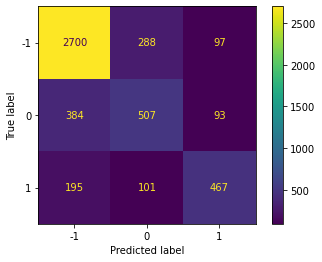

0.5148391374651609
              precision    recall  f1-score   support

          -1       0.83      0.58      0.68      3085
           0       0.31      0.73      0.44       984
           1       0.58      0.30      0.40       763

    accuracy                           0.56      4832
   macro avg       0.57      0.53      0.50      4832
weighted avg       0.68      0.56      0.59      4832

{-1: 0.6533526490066225, 0: 0.6169288079470199, 1: 0.855546357615894}


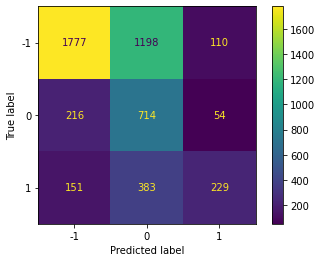

0.6719466526549831
              precision    recall  f1-score   support

          -1       0.83      0.87      0.85      3085
           0       0.56      0.53      0.54       984
           1       0.71      0.63      0.67       763

    accuracy                           0.76      4832
   macro avg       0.70      0.67      0.69      4832
weighted avg       0.75      0.76      0.76      4832

{-1: 0.7998758278145696, 0: 0.820364238410596, 1: 0.9008692052980133}


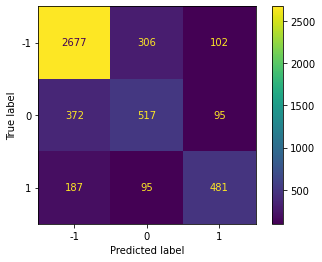

0.48167067815712683
              precision    recall  f1-score   support

          -1       0.84      0.52      0.64      3085
           0       0.49      0.26      0.34       984
           1       0.24      0.75      0.36       763

    accuracy                           0.50      4832
   macro avg       0.52      0.51      0.45      4832
weighted avg       0.67      0.50      0.54      4832

{-1: 0.6293460264900662, 0: 0.7942880794701986, 1: 0.5829884105960265}


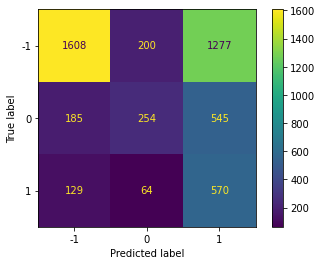

In [ ]:
#EXPERIMENTO 1 UNIGRAMS
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier
vect= CountVectorizer(stop_words='english')
X_train_vect = vect.fit_transform(X_train)
X_test_vect= vect.transform(X_test)
X_train_vect
clf= RandomForestClassifier(random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)

  
metricas(clf,X_test_vect, y_test)

#EXPERIMENTO 2 BIGRAMS
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier
vect= CountVectorizer(stop_words='english',ngram_range=(2,2))
X_train_vect = vect.fit_transform(X_train)
X_test_vect= vect.transform(X_test)
X_train_vect
clf= RandomForestClassifier(random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)

  
metricas(clf,X_test_vect, y_test)

#EXPERIMENTO 3 UNIGRAMS BALANCEANDO
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier
vect= CountVectorizer(stop_words='english')
X_train_vect = vect.fit_transform(X_train)
X_test_vect= vect.transform(X_test)
X_train_vect
clf= RandomForestClassifier(class_weight='balanced',random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)

  
metricas(clf,X_test_vect, y_test)

#EXPERIMENTO 4 BIGRAMS BALANCEANDO
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier
vect= CountVectorizer(stop_words='english',ngram_range=(2,2))
X_train_vect = vect.fit_transform(X_train)
X_test_vect= vect.transform(X_test)
X_train_vect
clf= RandomForestClassifier(class_weight='balanced',random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)

  
metricas(clf,X_test_vect, y_test)

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
0.596988621367265
              precision    recall  f1-score   support

          -1       0.77      0.96      0.86      3085
           0       0.70      0.38      0.49       984
           1       0.84      0.48      0.61       763

    accuracy                           0.77      4832
   macro avg       0.77      0.61      0.65      4832
weighted avg       0.77      0.77      0.74      4832

{-1: 0.7936672185430463, 0: 0.8394039735099338, 1: 0.9041804635761589}


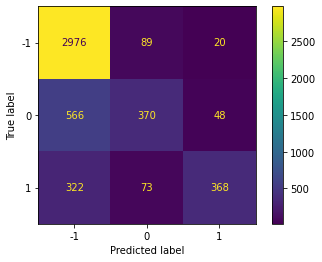

0.6138593856694536
              precision    recall  f1-score   support

          -1       0.78      0.96      0.86      3085
           0       0.69      0.42      0.52       984
           1       0.85      0.50      0.63       763

    accuracy                           0.78      4832
   macro avg       0.77      0.63      0.67      4832
weighted avg       0.77      0.78      0.76      4832

{-1: 0.8013245033112583, 0: 0.84375, 1: 0.9070778145695364}


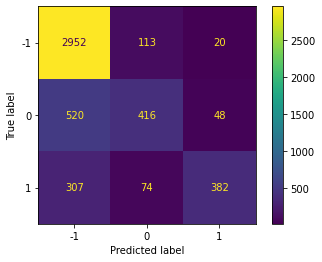

In [ ]:
# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')


# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]
  
#EXPERMIENTO 1: LEMMATIZATION WITH VERBS
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)
X_train_vect = vect_lemas.fit_transform(X_train)
X_test_vect= vect_lemas.transform(X_test)
clf= RandomForestClassifier(random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)

metricas(clf,X_test_vect, y_test)

#EXPERMIENTO 2: LEMMATIZATION WITH VERBS Y BLANCEANDO
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)
X_train_vect = vect_lemas.fit_transform(X_train)
X_test_vect= vect_lemas.transform(X_test)
clf= RandomForestClassifier(class_weight='balanced',random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)

metricas(clf,X_test_vect, y_test)



### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
0.5610841730825118
              precision    recall  f1-score   support

          -1       0.76      0.97      0.85      3085
           0       0.69      0.37      0.48       984
           1       0.84      0.42      0.56       763

    accuracy                           0.76      4832
   macro avg       0.76      0.59      0.63      4832
weighted avg       0.76      0.76      0.73      4832

{-1: 0.7858029801324503, 0: 0.8379552980132451, 1: 0.8961092715231788}


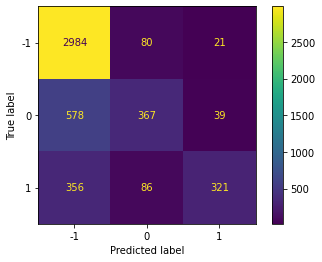

0.5774751357311697
              precision    recall  f1-score   support

          -1       0.77      0.96      0.86      3085
           0       0.68      0.42      0.52       984
           1       0.85      0.45      0.59       763

    accuracy                           0.77      4832
   macro avg       0.77      0.61      0.65      4832
weighted avg       0.77      0.77      0.75      4832

{-1: 0.7959437086092715, 0: 0.8410596026490066, 1: 0.9006622516556292}


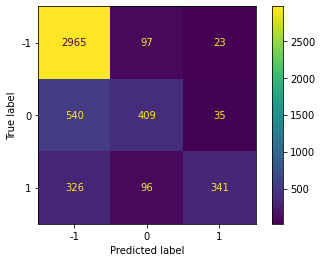

0.5532825448969678
              precision    recall  f1-score   support

          -1       0.76      0.97      0.85      3085
           0       0.67      0.38      0.48       984
           1       0.85      0.42      0.56       763

    accuracy                           0.76      4832
   macro avg       0.76      0.59      0.63      4832
weighted avg       0.76      0.76      0.73      4832

{-1: 0.7853890728476821, 0: 0.8354718543046358, 1: 0.8961092715231788}


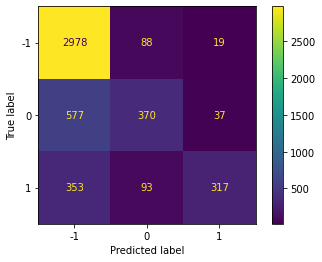

0.5728047266594857
              precision    recall  f1-score   support

          -1       0.77      0.96      0.86      3085
           0       0.68      0.42      0.52       984
           1       0.87      0.45      0.59       763

    accuracy                           0.77      4832
   macro avg       0.77      0.61      0.65      4832
weighted avg       0.77      0.77      0.74      4832

{-1: 0.7936672185430463, 0: 0.8410596026490066, 1: 0.9016970198675497}


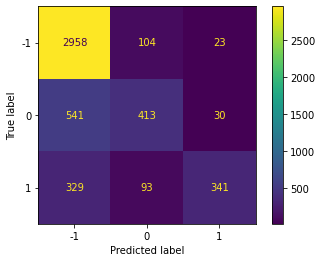

0.5947138207896427
              precision    recall  f1-score   support

          -1       0.80      0.94      0.87      3085
           0       0.68      0.49      0.57       984
           1       0.81      0.54      0.65       763

    accuracy                           0.78      4832
   macro avg       0.76      0.66      0.69      4832
weighted avg       0.78      0.78      0.77      4832

{-1: 0.8141556291390728, 0: 0.8483029801324503, 1: 0.9070778145695364}


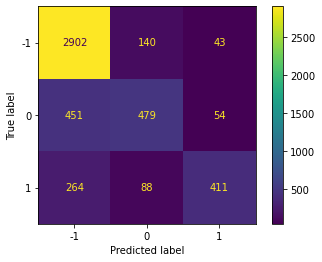

In [11]:
# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


from sklearn.metrics import  plot_confusion_matrix, classification_report,confusion_matrix, ConfusionMatrixDisplay

def metricas(modelo, XTest,yTest):
  yPred= modelo.predict(XTest)
  print(classification_report(yTest, yPred))
  cm = confusion_matrix(yTest, yPred, labels=modelo.classes_)
  accuracy_por_clases = {}
 #Accuracy intra-clases
  for idx, cls in enumerate(modelo.classes_):
    true_negatives = np.sum(np.delete(np.delete(cm, idx, axis=0), idx, axis=1))
    true_positives = cm[idx, idx]
    accuracy_por_clases[cls] = (true_positives + true_negatives) / np.sum(cm)
  print(accuracy_por_clases)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
  disp.plot()
  plt.show()
  
# EXPERIMENTO 1 : LEMATIZACION CON VERBOS, STOPWORDS
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]
vect_lemas = CountVectorizer(analyzer=split_into_lemmas,stop_words='english')
X_train_vect = vect_lemas.fit_transform(X_train)
X_test_vect= vect_lemas.transform(X_test)
clf= RandomForestClassifier(random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)
metricas(clf,X_test_vect, y_test)

# EXPERIMENTO 2 : LEMATIZACION CON VERBOS, SIN STOPWORDS Y BALANCEADO
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]
vect_lemas = CountVectorizer(analyzer=split_into_lemmas,stop_words='english')
X_train_vect = vect_lemas.fit_transform(X_train)
X_test_vect= vect_lemas.transform(X_test)
clf= RandomForestClassifier(class_weight='balanced',random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)
metricas(clf,X_test_vect, y_test)


#EXPERIMENTO 3: LEMATIZACION CON VERBOS, ADVERBIOS, ADJETIVOS Y SUSTANTIVOS MAS POS_TAG
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, TweetTokenizer
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

def split_into_lemmas(text):
  text = text.lower()
  words = text.split()
  tokens=[]
  wordnet_lemmatizer = WordNetLemmatizer()
  for word, tag in pos_tag(words):
    lemma = wordnet_lemmatizer.lemmatize(word, tag_map[tag[0]])
    tokens.append(lemma)
  return tokens
vect_lemas = CountVectorizer(analyzer=split_into_lemmas,stop_words='english')
X_train_vect = vect_lemas.fit_transform(X_train)
X_test_vect= vect_lemas.transform(X_test)
clf= RandomForestClassifier(random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)
metricas(clf,X_test_vect, y_test)

#EXPERIMENTO 4: LEMATIZACION CON VERBOS, ADVERBIOS, ADJETIVOS Y SUSTANTIVOS MAS POS_TAG Y BALANCEADO
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

def split_into_lemmas(text):
  text = text.lower()
  words = text.split()
  tokens=[]
  wordnet_lemmatizer = WordNetLemmatizer()
  for word, tag in pos_tag(words):
    lemma = wordnet_lemmatizer.lemmatize(word, tag_map[tag[0]])
    tokens.append(lemma)
  return tokens
vect_lemas = CountVectorizer(analyzer=split_into_lemmas,stop_words='english')
X_train_vect = vect_lemas.fit_transform(X_train)
X_test_vect= vect_lemas.transform(X_test)
clf= RandomForestClassifier(class_weight='balanced',random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)
metricas(clf,X_test_vect, y_test)

#EXPERIMENTO 5: TFIDVECTORIZER/TWEETOKENIZER
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
tokenizer = TweetTokenizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
clf= RandomForestClassifier(class_weight='balanced',random_state=0)
print(cross_val_score(clf,X_train_vect,y_train,cv=5,scoring='balanced_accuracy').mean())
clf.fit(X_train_vect,y_train)
metricas(clf,X_test_vect, y_test)



### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

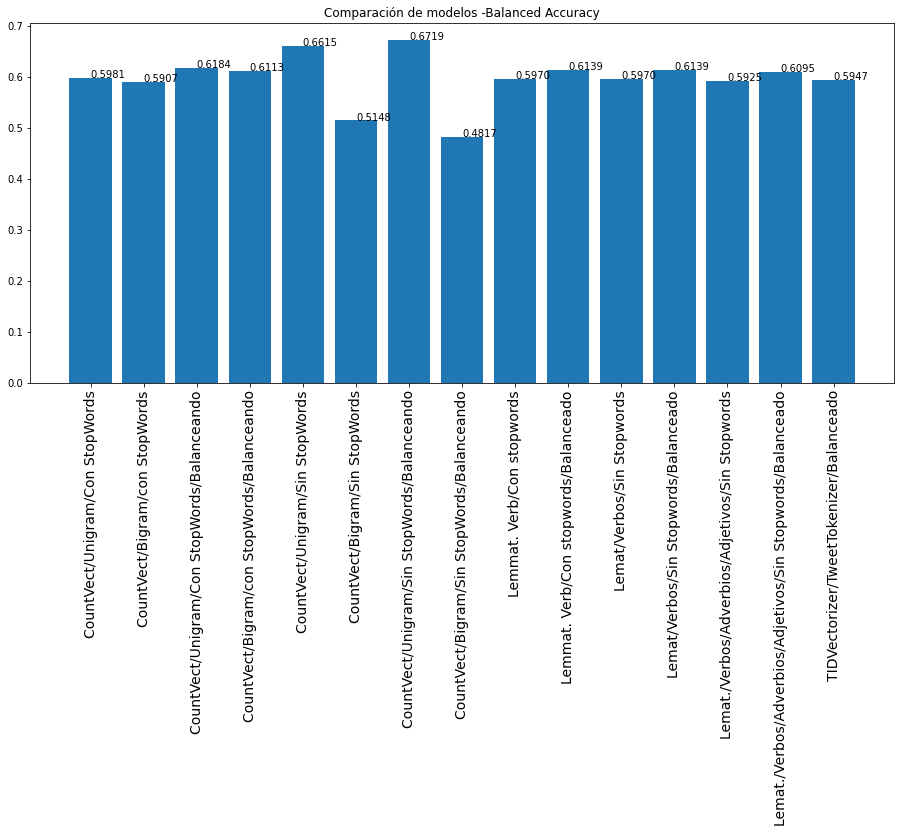

In [12]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos -Balanced Accuracy")
ejeX = ['CountVect/Unigram/Con StopWords','CountVect/Bigram/con StopWords',
        'CountVect/Unigram/Con StopWords/Balanceando','CountVect/Bigram/con StopWords/Balanceando',
        'CountVect/Unigram/Sin StopWords','CountVect/Bigram/Sin StopWords',
        'CountVect/Unigram/Sin StopWords/Balanceando','CountVect/Bigram/Sin StopWords/Balanceando',
        'Lemmat. Verb/Con stopwords',  'Lemmat. Verb/Con stopwords/Balanceado',
        'Lemat/Verbos/Sin Stopwords','Lemat/Verbos/Sin Stopwords/Balanceado' ,
        'Lemat./Verbos/Adverbios/Adjetivos/Sin Stopwords','Lemat./Verbos/Adverbios/Adjetivos/Sin Stopwords/Balanceado',
        'TIDVectorizer/TweetTokenizer/Balanceado']
ejeY = [0.5980525884195534, 0.5906538706342668, 0.6183600317994132, 0.6113090397843651,
        0.6614556267993172, 0.5148391374651609,  0.6719466526549831, 0.48167067815712683,
        0.596988621367265, 0.6138593856694536,
        0.596988621367265, 0.6138593856694536,
        0.5924610245145695,0.609527393639034,
        0.5947138207896427]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],"{:.4f}".format(y[i]),fontsize=10)
addlabels(ejeX,ejeY,plt)
plt.xticks(fontsize=14, rotation=90)
plt.show()

# Analisis
***
- Se procedio hacer una limpieza del texto inicialmente. Al fnal del taller, se opta por un experimento en donde se limpia el text sino se usa TweetTonekizer que es mas apropiado para resolver algunos especiales expresiones (hastags y simbolos) propios de Twiteer.  
- Se hizo un analisis del vocabulario paa conocer la longitud de tokens por unigrams, bi grams y con o sin stopwords, y el resultado fue:  
Longitud Vocabulario Sentimiento Negativo con Unigram: 9994  
Longitud Vocabulario Sentimiento Positvo Unigram: 4121  
Longitud Vocabulario Sentimiento Negativo Bigrama: 70948  
Longitud Vocabulario Sentimiento Positivo Bigrama: 16855  
Longitud Vocabulario Sentimiento Negativo Unigrama (sin Stopwords): 9719  
Longitud Vocabulario Sentimiento Positvo Unigrama (sin Stopwords): 3886  
Longitud Vocabulario Sentimiento  Negativo Bigrama (sin Stop 	words): 54958 

- Hay un desbalance notorio entre clases,  siendo con mas volumen el corpus del sentimiento negativo. Por esta razon, usamos la metrica de "balanced_accuracy"


## PRIMER EJERCICIO, se corrieron 4 experimentos:  
EXPERIMENTO 1 con UNIGRAMAS SIN SUPRESION DE STOPWORDS : este es un experimento base, tal como lo pidio el enunciado del ejercicio.  
EXPERIMENTO 2 con BIGRAMAS SIN SUPRESION DE STOPWORDS: este es un experimento para dar mayor contexto usando  bigramas dado que ciertas emociones  son formadas por 2 palabras. Tampoco se suprimio stopwords porque hay expresiones que se necesita la negacion y muchos vocablos forman pate de los stopwords.       
EXPERIMENTO 3 CON UNIGRAMAS SIN SUPRESION DE STOPWORDS y BALANCEANDO: dado que las clases estan desbalanceadas, se le informa al clasificador que de mayor peso a las clases minoritarias.   
EXPERIMENTO 4 CON BIGRAMAS SIN SUPRESION DE STOPWORDS Y  BALANCEANDO: ultimo experimento con bigramas y balanceando las clases minoritarias. </br>   
El mejor balanced_accuracy fue **0.6183600317994132** correspondiente al Experimento 3 con balanceo.

## SEGUNDO EJERCICIO, se corrieron 4 experimentos:  

EXPERIMENTO 1 con UNIGRAMAS CON SUPRESION DE STOPWORDS : este es un experimento base, tal como lo pidio el enunciado del ejercicio.  
EXPERIMENTO 2 con BIGRAMAS CON SUPRESION DE STOPWORDS: este es un experimento para dar mayor contexto usando  bigramas dado que ciertas emociones  son formadas por 2 palabras.   
EXPERIMENTO 3 CON UNIGRAMAS CON SUPRESION DE STOPWORDS y BALANCEANDO: dado que las clases estan desbalanceadas, se le informa al clasificador que de mayor peso a las clases minoritarias.   
EXPERIMENTO 4 con BIGRAMAS CON SUPRESION DE STOPWORDS Y  BALANCEANDO: ultimo experimento con bigramas y balanceando las clases minoritarias.  </br>    
El mejor balanced_accuracy fue **0.6719466526549831** correspondiente al Experimento 3 con balanceo.  
## TERCER EJERCICIO, se corrieron 2 experimentos:  
EXPERMIENTO 1 LEMMATIZATION  CON VERBOS: corresponde al ejercicion tal como lo pide el enunciado.  
EXPERMIENTO 2: LEMMATIZATION CON VERBOS Y BLANCEANDO: la unica diferencia es el el balanceo dentro del clasificador.   </br>   
El mejor balanced_accuracy fue **0.6138593856694536** correspondiente al Experimento 2 con balanceo.  

## CUARTO EJERCICIO, se corrieron 5 experimentos:  
EXPERIMENTO 1 LEMATIZACION CON VERBOS, SIN STOPWORDS: ejercicio base tal como lo pide el enunciado.  
EXPERIMENTO 2 LEMATIZACION CON VERBOS, SIN STOPWORDS Y BALANCEADO: el mismo ejericio anterior pero con balanceo de clases minoritarias en el clasificador.  
EXPERIMENTO 3 LEMATIZACION CON VERBOS, ADVERBIOS, ADJETIVOS Y SUSTANTIVOS Y POS_TAG: se usaron lemas pero dandole precision a la estructura sintaticas a traves de la categorizacion de "Part Of Speech" tag  
EXPERIMENTO 4 LEMATIZACION CON VERBOS, ADVERBIOS, ADJETIVOS Y SUSTANTIVOS MAS POS_TAG Y BALANCEADO: mismo Experimento 3 con balanceo de clases minortarias.  

EXPERIMENTO 5 TFIDVECTORIZER/TWEETOKENIZER: usar un diferente tonekizer, especificamente TweetTokenizer.Para esto, no se limpia el texto como el resto de modelo y simplemente se deja actuar el tokenizador.  </br>    
El mejor balanced_accuracy fue **0.6138593856694536** correspondiente al Experimento 2 con balanceo.  

# CONCLUSION
***

El mejor modelo fue EXPERIMENTO  CON UNIGRAMAS , CON SUPRESION DE STOPWORDS y BALANCEANDO, con un balanced_accuracy de 0.67

El de peor desempeno fue EXPERIMENTO CON BIGRAMAS, CON SUPRESSION DE STOPWORS y BALANCEADO, cn un balanced_accuracy de 0.48





